<a href="https://colab.research.google.com/github/sankethiyer217/Speech_Recognition/blob/main/SR_28_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle datasets download -d rtatman/cmu-pronouncing-dictionary

  0% 0.00/904k [00:00<?, ?B/s]
100% 904k/904k [00:00<00:00, 153MB/s]


In [5]:
!unzip *.zip

Archive:  cmu-pronouncing-dictionary.zip
  inflating: LICENSE.txt             
  inflating: cmudict.dict            
  inflating: cmudict.phones          
  inflating: cmudict.symbols         
  inflating: cmudict.vp              


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [7]:
words = []
phonics_list = []
dict_file = open('/content/cmudict.dict', 'r')
with dict_file as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
        x = p.split(' ')
        words.append(x[0])
        phonics_list.append(' '.join(x[1:]))
data = pd.DataFrame({'Word': words, 'Phonics': phonics_list})
data.head()

,Word,Phonics
0,'bout,B AW1 T
1,'cause,K AH0 Z
2,'course,K AO1 R S
3,'cuse,K Y UW1 Z
4,'em,AH0 M


In [9]:
data.shape

(135010, 2)

In [10]:
data.sample(10)

,Word,Phonics
103800,rosendale,R OW1 Z AH0 N D EY2 L
4021,anderegg,AE1 N D ER0 IH0 G
16896,bushings,B UH1 SH IH0 NG Z
47355,gentlewomen,JH EH1 N T AH0 L W IH2 M AH0 N
89841,partin,P AA1 R T IH0 N
119790,taxonomies,T AE2 K S AO1 N AH0 M IY2 Z
125565,unilever's,Y UW2 N IH0 L IY1 V ER0 Z
47912,giesler,G IY1 S AH0 L ER0
14512,bram,B R AE1 M
131609,wiers,W IY1 R Z


In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 's': 4, 'l': 5, 't': 6, 'r': 7, 'k': 8, 'd': 9, 'ih0': 10, 'm': 11, 'z': 12, 'er0': 13, 'iy0': 14, 'b': 15, 'eh1': 16, 'p': 17, 'aa1': 18, 'ae1': 19, 'ih1': 20, 'f': 21, 'g': 22, 'v': 23, 'iy1': 24, 'ng': 25, 'hh': 26, 'ey1': 27, 'w': 28, 'sh': 29, 'ow1': 30, 'ow0': 31, 'ao1': 32, 'ay1': 33, 'ah1': 34, 'uw1': 35, 'jh': 36, 'y': 37, 'aa0': 38, 'ch': 39, 'er1': 40, 'ih2': 41, 'eh2': 42, 'ey2': 43, 'ae2': 44, 'ay2': 45, 'aa2': 46, 'th': 47, 'eh0': 48, 'iy2': 49, 'ow2': 50, 'aw1': 51, 'uw0': 52, 'ao2': 53, 'ae0': 54, 'uh1': 55, 'ao0': 56, 'ay0': 57, 'uw2': 58, 'ah2': 59, 'ey0': 60, 'oy1': 61, 'aw2': 62, 'er2': 63, 'dh': 64, 'zh': 65, 'uh2': 66, 'aw0': 67, 'uh0': 68, 'oy2': 69, 'oy0': 70, 'foreign': 71, 'french': 72, 'abbrev': 73, 'name': 74, 'old': 75}


In [13]:
data = data[~data['Phonics'].str.contains('#')].reset_index(drop=True)
data.sample(10)

,Word,Phonics
79572,mirv,M ER1 V
56559,hopp,HH AA1 P
107706,scram,S K R AE1 M
56465,hoof,HH UW1 F
37967,endangered(2),IH0 N D EY1 N JH ER0 D
112815,soap,S OW1 P
80730,monopolizes,M AH0 N AA1 P AH0 L AY2 Z IH0 Z
3158,alsace(2),AE0 L S AE1 S
88814,packages(2),P AE1 K IH0 JH IH0 Z
99117,receptor,R IY0 S EH1 P T ER0


In [14]:

df = data.sample(1000).reset_index(drop=True)
df.shape

(1000, 2)

In [15]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 't': 4, 'l': 5, 's': 6, 'r': 7, 'k': 8, 'd': 9, 'm': 10, 'ih0': 11, 'z': 12, 'er0': 13, 'iy0': 14, 'b': 15, 'eh1': 16, 'p': 17, 'ih1': 18, 'aa1': 19, 'ae1': 20, 'f': 21, 'g': 22, 'v': 23, 'w': 24, 'ng': 25, 'iy1': 26, 'ao1': 27, 'ay1': 28, 'hh': 29, 'sh': 30, 'ah1': 31, 'uw1': 32, 'ow1': 33, 'ey1': 34, 'ow0': 35, 'jh': 36, 'aa0': 37, 'y': 38, 'ae2': 39, 'ch': 40, 'ih2': 41, 'ay2': 42, 'er1': 43, 'eh0': 44, 'eh2': 45, 'iy2': 46, 'aa2': 47, 'th': 48, 'uh1': 49, 'ao2': 50, 'ey2': 51, 'aw1': 52, 'uw0': 53, 'ow2': 54, 'ae0': 55, 'ay0': 56, 'ao0': 57, 'ah2': 58, 'uw2': 59, 'oy1': 60, 'dh': 61, 'aw0': 62, 'er2': 63, 'uh0': 64, 'ey0': 65, 'oy2': 66, 'oy0': 67, 'aw2': 68, 'zh': 69}


In [16]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

70

In [17]:
sequences = tokenizer.texts_to_sequences(df['Phonics'].values)
print(sequences[:5])

[[6, 4, 7, 20, 3, 9, 11, 9], [22, 18, 10, 15, 2, 5], [8, 5, 27, 6, 13], [8, 19, 10, 17, 38, 53], [8, 27, 7, 2, 5]]


In [18]:
longest_sentence = len(max(sequences, key=len))
longest_sentence

16

In [19]:
padded_phonics = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
print(padded_phonics[:5])

[[ 6  4  7 20  3  9 11  9  0  0  0  0  0  0  0  0]
 [22 18 10 15  2  5  0  0  0  0  0  0  0  0  0  0]
 [ 8  5 27  6 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 8 19 10 17 38 53  0  0  0  0  0  0  0  0  0  0]
 [ 8 27  7  2  5  0  0  0  0  0  0  0  0  0  0  0]]


In [21]:
len(df['Word'].unique())

1000

In [22]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(df['Word'].unique()), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 10)            700       
                                                                 
 lstm (LSTM)                 (None, 16, 256)           273408    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1000)              65000     
                                                                 
Total params: 544,484
Trainable params: 544,484
Non-trainable params: 0
_________________________________________________________________


In [23]:
y = df['Word'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
history = model.fit(padded_phonics, encoded_y, epochs=100, verbose=0)
model.evaluate(padded_phonics, encoded_y)

32/32 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.9000


[0.4250447452068329, 0.8999999761581421]

In [24]:
df.head(10)

,Word,Phonics
0,stranded,S T R AE1 N D IH0 D
1,gimbel,G IH1 M B AH0 L
2,closser,K L AO1 S ER0
3,compu,K AA1 M P Y UW0
4,koral,K AO1 R AH0 L
5,rockette,R AA0 K EH1 T
6,pharaoh,F EH1 R OW0
7,ridner,R IH1 D N ER0
8,certo,CH EH1 R T OW0
9,tanguma,T AA0 NG G UW1 M AH0


In [25]:
word_prob = model.predict(padded_phonics[6].reshape(1, -1))
word_pred = np.argmax(word_prob, axis=1)
word_pred = encoder.inverse_transform(word_pred)
word_pred

array(['pharaoh'], dtype=object)

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [27]:
embedding_weights = np.array(model.get_weights()[0])[:-1]
pca  = PCA(2)
pca_x = pca.fit_transform(embedding_weights)
pca_x = pd.DataFrame(pca_x, columns=['PCA1', 'PCA2'])
pca_x['Phonemes'] = word_index.keys()
pca_x.head()

,PCA1,PCA2,Phonemes
0,0.422917,-0.147909,<OOV>
1,-0.001901,-0.025783,ah0
2,-0.372723,0.040814,n
3,-0.233175,-0.030009,t
4,-0.680694,0.065960,l


In [28]:
pca_x['clean_Phonemes'] = pca_x['Phonemes'].apply(lambda x: re.sub("[^a-zA-Z<>]","",x))
pca_x.head()

,PCA1,PCA2,Phonemes,clean_Phonemes
0,0.422917,-0.147909,<OOV>,<OOV>
1,-0.001901,-0.025783,ah0,ah
2,-0.372723,0.040814,n,n
3,-0.233175,-0.030009,t,t
4,-0.680694,0.065960,l,l


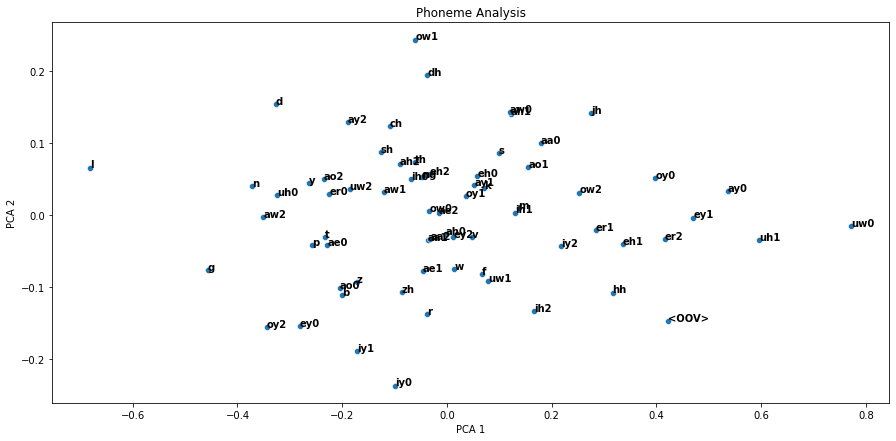

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_x, x='PCA1', y='PCA2')
for line in range(0, pca_x.shape[0]):
     plt.text(pca_x.PCA1[line], pca_x.PCA2[line], pca_x.Phonemes[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Phoneme Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [30]:
phonemes_list = []
phonics_type_list = []
ptype_file = open('/content/cmudict.phones', 'r')
with ptype_file as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
        x = p.split('\t')
        phonemes_list.append(x[0].lower())
        phonics_type_list.append(x[1])
ptype_df = pd.DataFrame({'clean_Phonemes': phonemes_list, 'Type': phonics_type_list})
ptype_df.head()

,clean_Phonemes,Type
0,aa,vowel
1,ae,vowel
2,ah,vowel
3,ao,vowel
4,aw,vowel


In [31]:
pca_x2 = pd.merge(pca_x, ptype_df, how='inner')
pca_x2.head()

,PCA1,PCA2,Phonemes,clean_Phonemes,Type
0,-0.001901,-0.025783,ah0,ah,vowel
1,0.121621,0.140126,ah1,ah,vowel
2,-0.089812,0.071162,ah2,ah,vowel
3,-0.372723,0.040814,n,n,nasal
4,-0.233175,-0.030009,t,t,stop


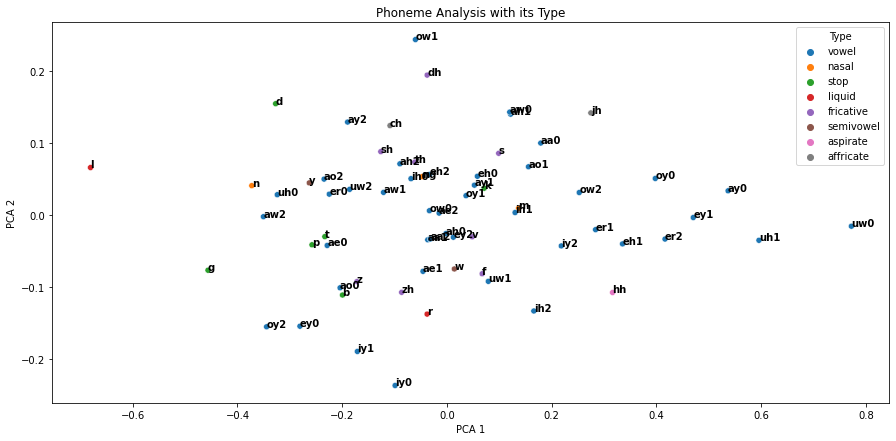

In [32]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_x2, x='PCA1', y='PCA2', hue='Type')
for line in range(0, pca_x2.shape[0]):
     plt.text(pca_x2.PCA1[line], pca_x2.PCA2[line], pca_x2.Phonemes[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Phoneme Analysis with its Type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()